# Loan Default Prediction 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # For easier statistical plotting
sns.set_style("whitegrid")

In [2]:
import warnings
warnings. filterwarnings('ignore')

## Data Extraction

In [3]:
data = pd.read_csv("train_v2.csv")
data.shape

(105471, 771)

In [4]:
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [6]:
data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,...,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,...,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,...,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,...,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,...,5.000000,1.480000,-5.700000,0.740000,0.198400,-0.704275,0.000000,0.000000,19.000000,0.000000
50%,52736.000000,129.000000,9.000000,0.498267,2200.000000,4.000000,76530.000000,2292.000000,1786.000000,128.460000,...,11.000000,3.570000,-2.600000,1.990000,0.251800,0.375400,0.000000,0.000000,40.000000,0.000000
75%,79103.500000,148.000000,9.000000,0.749494,3700.000000,10.000000,80135.000000,4679.000000,3411.000000,149.080000,...,23.000000,7.700000,-1.010000,4.440000,0.283600,0.737100,1.000000,1.000000,104.000000,0.000000
max,105471.000000,176.000000,11.000000,0.999994,7900.000000,17.000000,88565.000000,9968.000000,11541.000000,172.950000,...,168.000000,58.120000,0.000000,34.040000,0.473700,11.092000,1.000000,1.000000,1212.000000,100.000000


## Feature Engineering

In [7]:
categorical_feats = data.dtypes[data.dtypes == 'object'].index
data[categorical_feats].head()

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,8090000000000000,754485076006959972352,3200000000000,38600000000000000,7900000000000000,683091368180479950848,7610000000000,10370164393071999997033054208,13621142007705000132589703585884798976,137000000000,511000000000000,569877634360569973702656,3427303293502300223465356001280,240811094251680005357568,1185103615651699994464937312256,11724173453590999285553430528,16027029142402000396838501389877379072,8700000000000000000,8010000000000000000
1,2250000000000,15300000000000000,392000000000,1690000000000000,92300000000000,2140000000000000000,796594176,5098137566366599989877014528,5366154527659000357778647583412977664,9483264,1593188352,107000000000000000,9894337169928600158208,251470350285930004480,161196782629860003268263936,6391495663130699779035627520,7158933769610900052770065343332745216,5890000000000000000,5030000000000000000
2,186000000000000,6910365323840000000,23700000000000,389000000000000000,10300000000000,69200000000000000,461000000000,26400269714792999161039945728,36117033568522998807722429270944907264,36051866452,63500000000000,313319151143610023936,222812827058929985669562368,116067852739909992448,61668865475731997253959680,36420952401170000260810932224,56027915541865997900093655676589441024,24512111987574001664,19855991371293999104
3,44500000000000000,11225194901267999096832,16098514954,35000000000000,22200000000000,295000000000000000,1330000000000,9333818143939599917454983168,12638526060843999893906772076814925824,5621900678,9380000000000,2641626213765599994052608,24452856014536001129152839155712,202899352692079984640,126293716597939998795235328,15267506423634001098621059072,24362045267421999852972382580757233664,9660000000000000000,6960000000000000000
4,52152926246,108000000000000,442000000000,1870000000000000,3630000000000,23100000000000000,2240000000000,196004669899870011305513451520,428213273484070002013091334592080642048,279000000000,659000000000000,68300000000000,922000000000000000,654000000000000000,89341826582645997305856,238204359524660008028924280832,550170020491249969340152709153269219328,108505460071560003584,94766610066210996224


these categorical columns seems to be way too high and encoding them will be difficult, so we will drop them.

In [8]:
categorical_feats

Index(['f137', 'f138', 'f206', 'f207', 'f276', 'f277', 'f338', 'f390', 'f391',
       'f419', 'f420', 'f469', 'f472', 'f534', 'f537', 'f626', 'f627', 'f695',
       'f698'],
      dtype='object')

In [9]:
for col in categorical_feats:
    data = data.drop([col], axis = 1)


### Missing value treatment

Since some of the columns have missing values, so we will impute them by the mean of the column.

In [10]:
# check the mingging values
data.isnull().sum()

id         0
f1         0
f2         0
f3         0
f4         0
        ... 
f775    1525
f776       0
f777       0
f778       0
loss       0
Length: 752, dtype: int64

In [11]:
#imputing missing values with mean of that column
data= data.fillna(data.mean(), inplace=False)

In [12]:
data.isnull().sum()

id      0
f1      0
f2      0
f3      0
f4      0
       ..
f775    0
f776    0
f777    0
f778    0
loss    0
Length: 752, dtype: int64

### Correlation

In [13]:
# Find all correlations of every feature with the target(loss)
corr = data.corr()['loss'].sort_values()

# Print the most negative correlations
print(corr.head(30), '\n')

# Print the most positive correlations
print(corr.tail(30))

f612   -0.016543
f776   -0.015506
f315   -0.011110
f314   -0.010643
f70    -0.010450
f323   -0.010394
f69    -0.009851
f631   -0.009097
f734   -0.008987
f322   -0.008834
f738   -0.008340
f1     -0.008231
f428   -0.008081
f10    -0.007784
f666   -0.007747
f290   -0.007706
f299   -0.007622
f665   -0.007568
f291   -0.007263
f775   -0.007223
f298   -0.007095
f526   -0.007027
f740   -0.006850
f285   -0.006798
f667   -0.006711
f211   -0.006582
f425   -0.006499
f426   -0.006379
f9     -0.006301
f699   -0.006135
Name: loss, dtype: float64 

f514    0.010524
f370    0.010617
f353    0.010761
f617    0.011093
f675    0.011158
f13     0.011188
f468    0.011211
f556    0.011382
f251    0.011880
f221    0.012016
f68     0.012987
f597    0.013758
f599    0.013758
f670    0.014595
f67     0.014740
f674    0.019426
f536    0.025652
f471    0.039849
loss    1.000000
f33          NaN
f34          NaN
f35          NaN
f37          NaN
f38          NaN
f678         NaN
f700         NaN
f701         NaN
f7

In [14]:
# Remove variabels that have NaN correlation with loss  
corr_tar_df = corr.to_frame().transpose()
col_to_drop = corr_tar_df.columns[corr_tar_df.isna().any()].to_list()
print(col_to_drop)

['f33', 'f34', 'f35', 'f37', 'f38', 'f678', 'f700', 'f701', 'f702', 'f736', 'f764']


In [15]:
data= data.drop(columns = col_to_drop)


## Target Engineering

To indicate whether a loan will be default or not, the loss was measured lies between 0 and 100. 
In these observation, a loss of 60 means that only 40 is reimbursed. If the loan did not default, the loss was 0.
so, to transform this problem into binary classification, we will transform all non zero loss into class 1, 
which mean a default was triggered.

In [16]:
data['loss'].value_counts()

0     95688
2      1297
1      1145
3      1086
4      1038
      ...  
92        1
77        1
85        1
80        1
63        1
Name: loss, Length: 89, dtype: int64

In [17]:
# convert the target into binary number: 0 for non-default and 1 for default
#y_binary = y.copy()
#y_binary[y_binary>0] = 1
#y_binary.value_counts()
data['loss'][data['loss']>0] = 1
data['loss'].value_counts()

0    95688
1     9783
Name: loss, dtype: int64

<AxesSubplot:xlabel='loss', ylabel='count'>

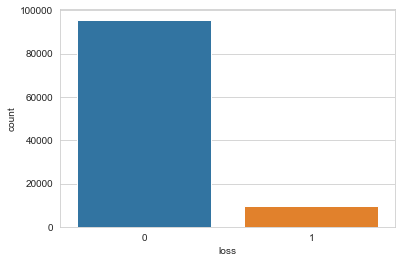

In [18]:
sns.countplot(data['loss'])

### Over Sampling

The above count plot indicates that we have imbalanced dataset. This kind of dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. To overcome this situation resampling methods like oversampling or undersampling need to be done. This time, I will perform oversampling where we will duplicate or create new synthetic examples in the minority class.

In [19]:
# Divide by class
count_class_0, count_class_1 = data['loss'].value_counts()
print(count_class_0, count_class_1)
data_class_0 = data[data['loss'] == 0]
data_class_1 = data[data['loss'] == 1]

95688 9783


Random over-sampling:
1    95688
0    95688
Name: loss, dtype: int64


<AxesSubplot:xlabel='loss', ylabel='count'>

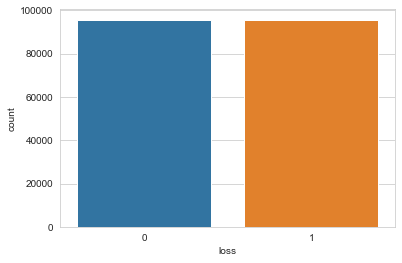

In [20]:
# OVER SAMPLING 
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_test_over.loss.value_counts())

sns.countplot(data_test_over['loss'])

In [21]:
data_test_over.shape

(191376, 741)

In [22]:
X = data_test_over.drop(['id', 'loss'],  axis = 1)
y = data_test_over['loss']
X.shape

(191376, 739)

### Train test split

In [23]:
# sp
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(153100, 739), (38276, 739), (153100,), (38276,)]

### Variable Standardization

Most of the time, machine learning algorithms perform better when datasets are scaled to a standard range,
especially, the data has input values with differing scales. 
The main idea of standardization is  rescaling the distribution of values so that the mean 
of observed values is 0 and the standard deviation is 1.

In [24]:
#Standardization of Variables
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### Dimentional Reduction with Principal Component Analysis (PCA)

PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of data sets, 
by transforming a large set of variables into a smaller one that still retain as much information as possible.

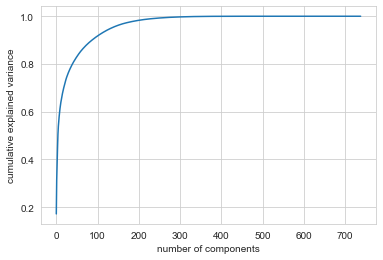

In [25]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [26]:
np.cumsum(pca.explained_variance_ratio_)[200]

0.9829937212606565

In [27]:
final_pca = PCA(n_components=200)
final_pca.fit(X_train)
X_train_pca = final_pca.transform(X_train)
X_train_pca = pd.DataFrame(data = X_train_pca)
X_test_pca = final_pca.transform(X_test)
X_test_pca = pd.DataFrame(data = X_test_pca)

## Modelling

### Logistic Regression

In [28]:
#Fitting Logistic Regression to training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_model = LogisticRegression()
log_model.fit(X_train_pca, y_train)

accuracies = cross_val_score(estimator = log_model, X = X_train_pca, y = y_train, cv = 5)
random_cross = accuracies.mean()
print('Logistic Regressiont Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Logistic Regressiont Performance on the test set: Cross Validation Score = 0.6617


In [29]:
y_pred= log_model.predict(X_test_pca)

In [30]:
import sklearn.metrics as sm
cmatrix = pd.DataFrame(sm.confusion_matrix(y_test, y_pred), index=['Actual non-default (0)','Actual default (1)'])
cmatrix.columns = ['Predicted non-default (0)','Predicted default (1)']
cmatrix

,Predicted non-default (0),Predicted default (1)
Actual non-default (0),12235,7054
Actual default (1),5856,13131


In [31]:
print(["The accuracy on the test data is " + str(round(sm.accuracy_score(y_test, y_pred)*100,ndigits = 2)) + "%"])


['The accuracy on the test data is 66.27%']


In [32]:
from sklearn.metrics import f1_score
print("F1 score is :",round(f1_score(y_test, y_pred, average='macro'),3)) 

F1 score is : 0.663


### Random Forest

In [33]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random.fit(X_train_pca, y_train)

accuracies = cross_val_score(estimator = random, X = X_train_pca, y = y_train, cv = 5)
random_cross = accuracies.mean()
print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9921


In [34]:
random_pred = random.predict(X_test_pca)

In [35]:
import sklearn.metrics as sm
cmatrix = pd.DataFrame(sm.confusion_matrix(y_test, random_pred), index=['Actual non-default (0)','Actual default (1)'])
cmatrix.columns = ['Predicted non-default (0)','Predicted default (1)']
cmatrix

,Predicted non-default (0),Predicted default (1)
Actual non-default (0),19191,98
Actual default (1),27,18960


In [36]:
print(["The accuracy on the test data is " + str(round(sm.accuracy_score(y_test, random_pred)*100,ndigits = 2)) + "%"])


['The accuracy on the test data is 99.67%']


In [37]:
print("F1 score is :",round(f1_score(y_test, random_pred, average='macro'),3)) 

F1 score is : 0.997


### Decision Tree

In [38]:
#Fitting Decision Tree to training set
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)

accuracies = cross_val_score(estimator = dtree, X = X_train_pca, y = y_train, cv = 5)
random_cross = accuracies.mean()
print('Decision Tree Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Decision Tree Performance on the test set: Cross Validation Score = 0.9310


In [39]:
dtree_pred = random.predict(X_test_pca)

In [40]:
import sklearn.metrics as sm
cmatrix = pd.DataFrame(sm.confusion_matrix(y_test, dtree_pred), index=['Actual non-default (0)','Actual default (1)'])
cmatrix.columns = ['Predicted non-default (0)','Predicted default (1)']
cmatrix

,Predicted non-default (0),Predicted default (1)
Actual non-default (0),19191,98
Actual default (1),27,18960


In [41]:
print(["The accuracy on the test data is " + str(round(sm.accuracy_score(y_test, dtree_pred)*100,ndigits = 2)) + "%"])


['The accuracy on the test data is 99.67%']


In [42]:
print("F1 score is :",round(f1_score(y_test, dtree_pred, average='macro'),3)) 

F1 score is : 0.997
